![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

In [19]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading dataset
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Checking no of rows and columns of the dataset
df.shape

(400, 26)

# **Data Cleaning**

In [5]:
# drop id column
df = df.drop('id',axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# checking info of columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now

In [9]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
# Creating a function to convert data type to float

def convert_to_num_dtype(df,feature):
  df[feature] = pd.to_numeric(df[feature],errors='coerce')

In [10]:
features1 = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']

for feature in features1:
  convert_to_num_dtype(df,feature)

In [11]:
# Rechecking the data types
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [12]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']


In [13]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [14]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [15]:
# by looping & looking at unique values in categorical columns

for col in cat_cols:
  print(f'{col} has {df[col].unique()} values\n')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [16]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols

df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)
df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [17]:
# Rechecking by looping & looking at unique values in categorical columns

for col in cat_cols:
  print(f'{col} has {df[col].unique()} values\n')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [18]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# **EDA**

In [20]:
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [21]:
# let's see the cols in numerical col list
num_cols


['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

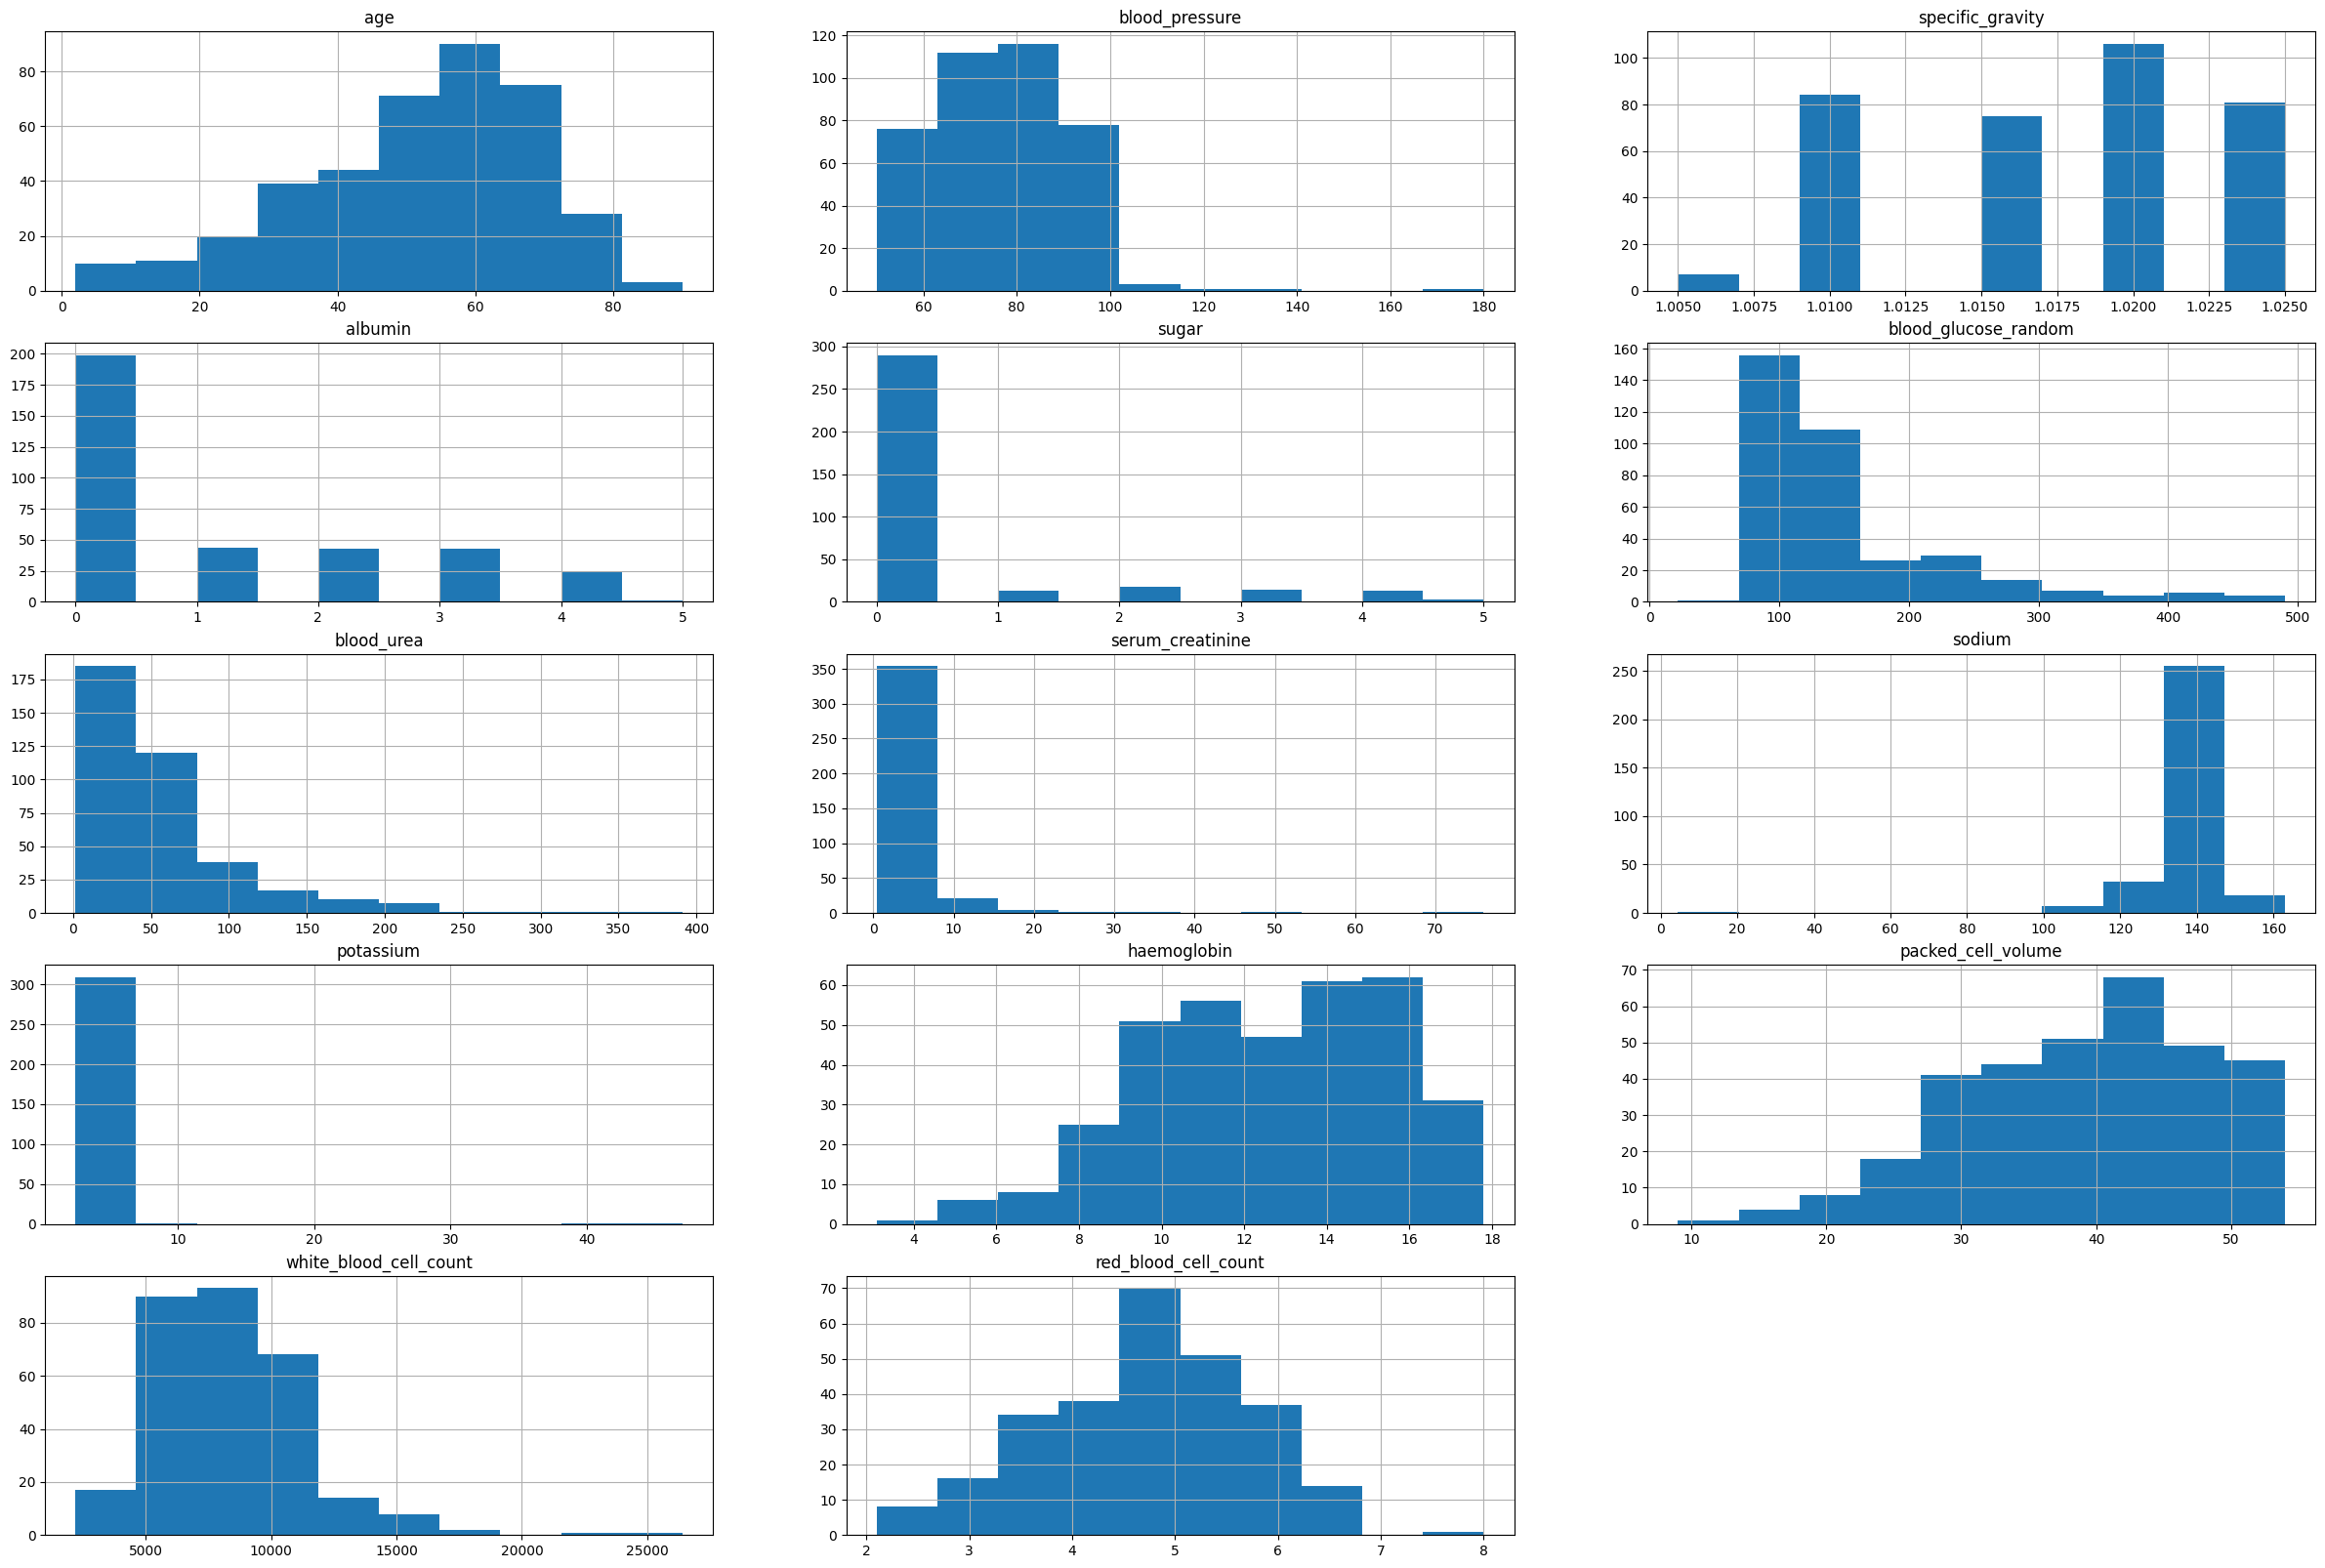

In [22]:
# checking numerical features distribution
plt.figure(figsize=(30,20))

# looping over num cols and checking its distribution

for i,col in enumerate(num_cols):
  plt.subplot(5,3,i+1)
  df[col].hist()
  plt.title(col)

We can observe that the distribution of the age, haemoglobin, packed cell volume and red blood cell count feature is left skewed which means that there is some kind of negative or low value outliers.
We can also observe that the distribution of blood glucose, blood urea and white bllod cell count feature is right skewed which means that there is some kind of negative or high value outliers.

In [23]:
# let's see the cols in cat col list

cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

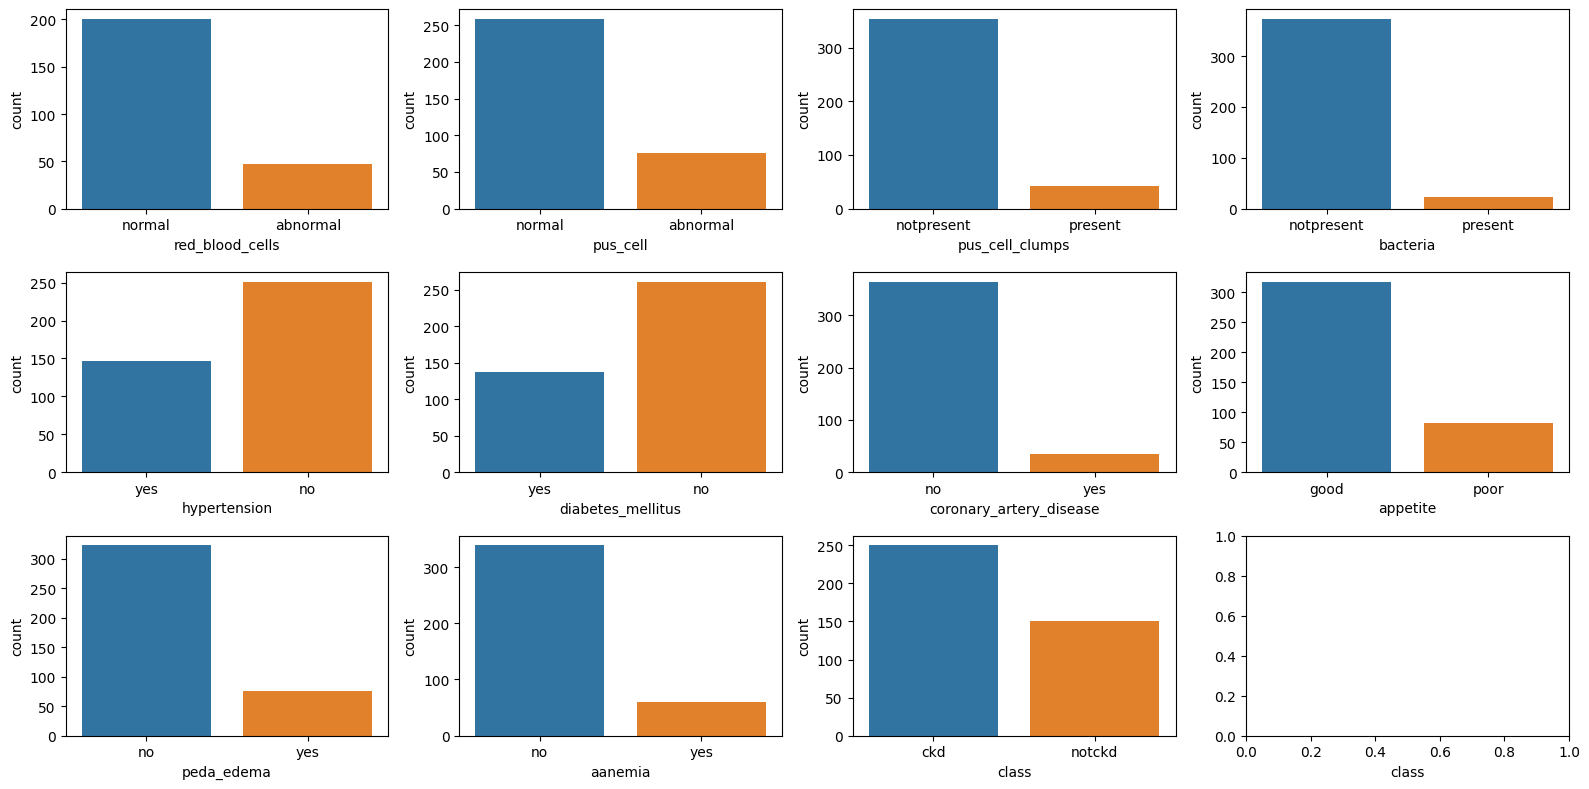

In [29]:
# checking cat features distribution
# create the figure and axes

fig, axes = plt.subplots(3, 4, figsize=(16,8))
axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot

for col,ax in zip(cat_cols,axes):
  sns.countplot(data=df,x=col,ax=ax)
  plt.xlabel(col)
  fig.tight_layout()


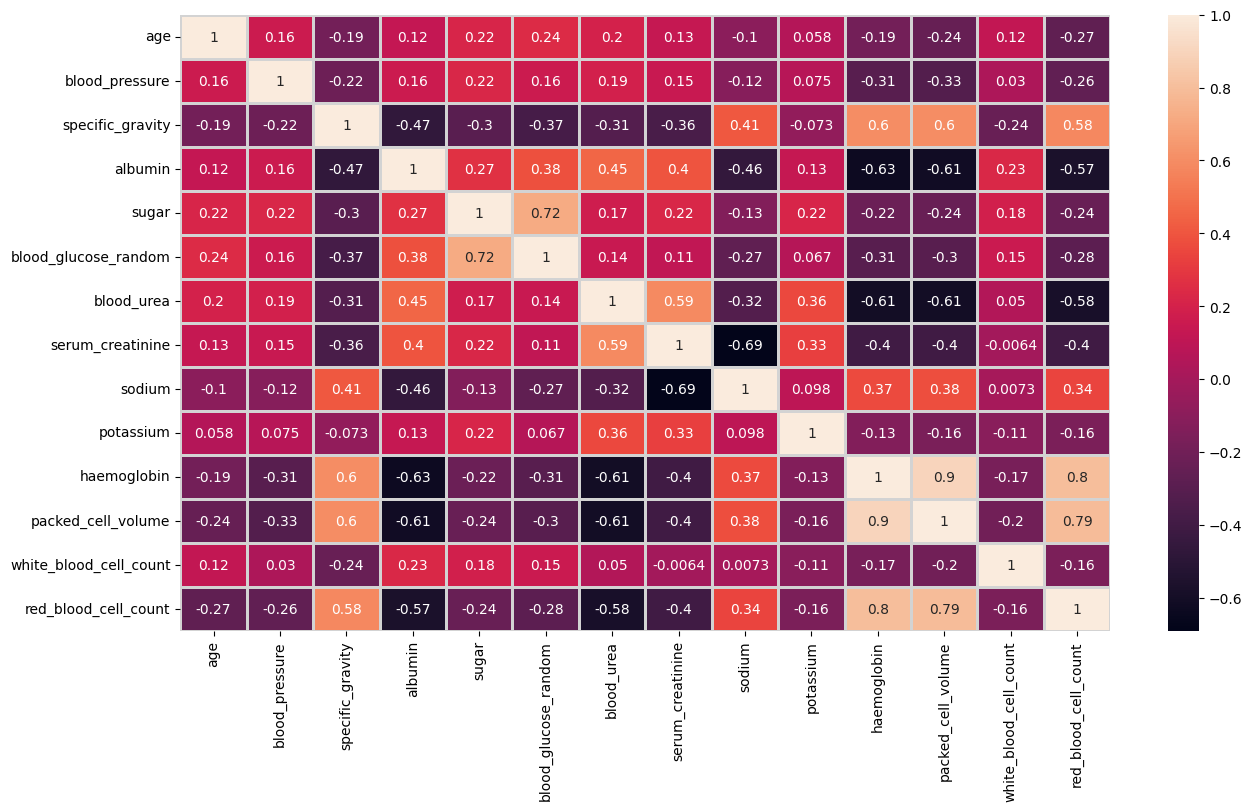

In [31]:
# correlated heatmap of data for numerical variables

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='lightgrey')
plt.show()

# **Creating Functions for violin plot, scatter plot and kdeplot to automate analysis**

In [42]:
def violin(col):
  fig = px.violin(df, y=col, x='class',color='class',box=True)
  return fig.show()

In [54]:
def scatters(col1,col2):
  fig = px.scatter(df, x=col1, y=col2 ,color='class')
  return fig.show()

In [47]:
def kde(col):
  grid = sns.FacetGrid(df, hue='class', aspect=2)
  grid.map(sns.kdeplot,col)
  grid.add_legend()

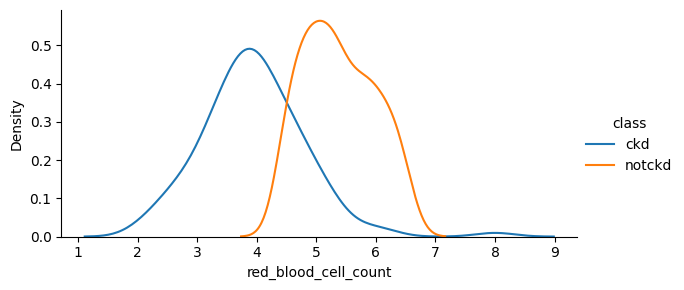

In [45]:
kde('red_blood_cell_count')

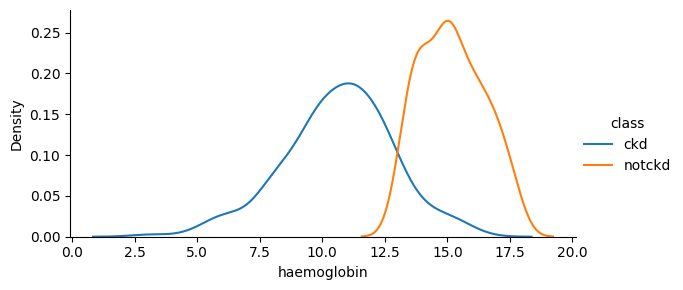

In [48]:
kde('haemoglobin')

We can observe that people who do not have a chronic kidney disease have a higher probability of having higher blood cell count and haemoglobin.

In [60]:
scatters('red_blood_cell_count','haemoglobin')

We can conclude that there is a linear trend between red blood cell count and haemoglobin for chronic patients. So when red blood cell increases, packed cell volume also increases in a linear way and vice versa. But there is a non linear trend between them for non chronic people.

In [62]:
violin('red_blood_cell_count')

We observe there when red blood cell count is between 4 and 7, there is high probability that the person will not have chronic kidney disease. Whereas, if the count is below 4 there is a huge probability that the person may suffer from chronic kidney disease.

In [65]:
violin('haemoglobin')

We observe there when haemoglobin is between 12 and 19, there is high probability that the person will not have chronic kidney disease. Whereas, if the count is below 12 there is a huge probability that the person may suffer from chronic kidney disease.

In [66]:
# let's check count of null values in whole df

df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

# Feature Engineering

In [70]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(col):
    random_sample = df[col].dropna().sample(df[col].isna().sum())
    random_sample.index = df[df[col].isnull()].index
    df.loc[df[col].isnull(), col] = random_sample

# creating func for imputing most common value(modal value)
def impute_mode(col):
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [73]:
# let's check count of null values in num_cols

df[num_cols].isna().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [71]:
# filling num_cols null values using random sampling method

for col in num_cols:
  random_value_imputation(col)

In [72]:
# let's check count of null values in num_cols again

df[num_cols].isna().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [74]:
# let's check count of null values in cat cols

df[cat_cols].isna().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [75]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')


for col in cat_cols:
  impute_mode(col)

In [76]:
# let's check count of null values in cat_cols again
df[cat_cols].isna().sum().sort_values(ascending=False)


red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [77]:
# checking count of null values in whole dataframe
df.isna().sum().sort_values(ascending=False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [79]:
# check unique categories in each cat col by looping over cat cols

for col in cat_cols:
  print(f'{col} has {df[col].nunique()} categories\n')

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [82]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [83]:
# check chronic df after transforming cat cols
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,140.0,...,38.0,6000.0,5.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.9,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


# **Feature Selection**

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [102]:
# Seperating features into independent and dependent
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

In [103]:
x = df[ind_col]
y = df[dep_col]

In [104]:
x.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,140.0,...,11.3,38.0,6000.0,5.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,3.9,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [105]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [106]:
ordered_rank_feat = SelectKBest(score_func=chi2,k=20)
ordered_feat = ordered_rank_feat.fit(x,y)

In [107]:
ordered_feat.scores_

array([1.02660972e+02, 8.06422339e+01, 5.43449631e-03, 2.23580198e+02,
       1.01607568e+02, 9.36523517e+00, 1.51510248e+01, 2.52000000e+01,
       1.32000000e+01, 2.40050706e+03, 2.20935901e+03, 3.71137030e+02,
       2.87333403e+01, 2.91892007e+00, 1.31531607e+02, 3.62627978e+02,
       1.56807987e+04, 1.81202284e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [109]:
datascores = pd.DataFrame(ordered_feat.scores_, columns=['Score'])
datascores

,Score
0,102.660972
1,80.642234
2,0.005434
3,223.580198
4,101.607568
5,9.365235
6,15.151025
7,25.200000
8,13.200000
9,2400.507059


In [111]:
# Creating a dataframe of all columns so that we can concatenate both dataframes
dfcols = pd.DataFrame(x.columns)
dfcols

,0
0,age
1,blood_pressure
2,specific_gravity
3,albumin
4,sugar
5,red_blood_cells
6,pus_cell
7,pus_cell_clumps
8,bacteria
9,blood_glucose_random


In [114]:
# Concatenating the dfcols datascores dataframe and manually assigning column names to them
ranked_feat = pd.concat([dfcols,datascores], axis=1)
ranked_feat.columns = ['Features','Score']
ranked_feat

,Features,Score
0,age,102.660972
1,blood_pressure,80.642234
2,specific_gravity,0.005434
3,albumin,223.580198
4,sugar,101.607568
5,red_blood_cells,9.365235
6,pus_cell,15.151025
7,pus_cell_clumps,25.200000
8,bacteria,13.200000
9,blood_glucose_random,2400.507059


In [115]:
# Finding the top 10 features on the basis of their scores
ranked_feat.nlargest(10,'Score')

,Features,Score
16,white_blood_cell_count,15680.798719
9,blood_glucose_random,2400.507059
10,blood_urea,2209.359009
11,serum_creatinine,371.137030
15,packed_cell_volume,362.627978
3,albumin,223.580198
14,haemoglobin,131.531607
0,age,102.660972
4,sugar,101.607568
18,hypertension,88.200000


In [120]:
sel_col = ranked_feat.nlargest(10,'Score')['Features'].values

In [121]:
# Creating a new Dataframe with top 10 features
x_new = df[sel_col]
x_new.head()

,white_blood_cell_count,blood_glucose_random,blood_urea,serum_creatinine,packed_cell_volume,albumin,haemoglobin,age,sugar,hypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,140.0,18.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,51.0,0.0,0


# **Train Test Split**

In [122]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, df['class'], test_size= 0.30)

# **Model Building**

In [132]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



knn = KNeighborsClassifier()
knn.fit(x_train,y_train)


# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(x_test))

print(f'Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(x_train))}')
print(f'Test Accuracy of KNN is {knn_acc}\n')
print(f'Confusion Matrix : \n{confusion_matrix(y_test, knn.predict(x_test))}\n')
print(f'Classification Report : \n{classification_report(y_test, knn.predict(x_test))}')



Training Accuracy of KNN is 0.7607142857142857
Test Accuracy of KNN is 0.65

Confusion Matrix : 
[[47 20]
 [22 31]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        67
           1       0.61      0.58      0.60        53

    accuracy                           0.65       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.65      0.65      0.65       120



In [151]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f'Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(x_train))}')
print(f'Test Accuracy of DTC is {accuracy_score(y_test, dtc.predict(x_test))}\n')
print(f'Confusion Matrix :\n {confusion_matrix(y_test, dtc.predict(x_test))}\n')
print(f'Classification Report : \n{classification_report(y_test, dtc.predict(x_test))}')



Training Accuracy of DTC is 0.9571428571428572
Test Accuracy of DTC is 0.9416666666666667

Confusion Matrix :
 [[62  5]
 [ 2 51]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.91      0.96      0.94        53

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [152]:
from sklearn.linear_model import LogisticRegression

# Define and train a logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        67
           1       0.86      0.92      0.89        53

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120

